# Importing Data

Arff dosyasındaki whitespace ile ilgili hatalar giderildi.

In [20]:
from scipy.io.arff import loadarff 
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

string_attributes = ["sg","al","su","rbc","pc","pcc","ba","htn","dm","cad","appet","pe","ane","class"]
raw_data = loadarff('chronic_kidney_disease.arff')
dataset = pd.DataFrame(raw_data[0])
for colname in string_attributes:
  dataset[colname] = dataset[colname].str.decode('utf-8') 

dataset.columns = dataset.columns.str.strip('\'')
dataset.columns = dataset.columns.str.strip()
dataset = dataset.replace("?",np.nan)
dataset

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0,0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0,0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0,0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


## Identifying Features on Data

In [2]:
print(len(dataset[dataset.iloc[:,-1]=='ckd']),len(dataset[dataset.iloc[:,-1]=='notckd']))

250 150


    400 tane sample var, 250 tanesinde Kronik böbrek hastalığı varken, 150 tanesinde yok.

age	-	Yaş(nümerik)
bp	-	Kan Basıncı(nümerik; mm/Hg)
sg	-	Özgül Ağırlık(nominal; 5 farklı değere sahip)
al	-   Albümin(nominal; 0,1,2,3,4,5 değerlerine sahip )
su  -	Şeker(nominal; 0,1,2,3,4,5 değerlerine sahip)
rbc	-	Kırmızı Kan Hücreleri(nominal; normal veya anormal)
rbc -   Anlam dökümanda belirtilmemiş nümerik)
pc	-	İrin hücresi(nominal; normal ya da anormal)
pcc	-	İrin Hücre Kümeleri(nominal; mevcut ya da değil)
ba	-	Bakteri(nominal; mevcut ya da değil)
bgr	-	Kan Şekeri(nümerik; mgs/dl (litre başına gram))
bu	-	Kan üresi(nümerik; mgs/dl)
sc	-	Serum kreatinin(nümerik; mgs/dl)
sod	-	Sodyum(nümerik; mEq/L)
pot	-	Potasyum(nümerik; mEq/L)
hemo-   Hemoglobin(nümerik; gms)
pcv	-	Paketlenmiş Hücre Hacmi(nümerik)
wc	-	Beyaz Kan Hücresi Sayısı(nümerik; kübik milimetre başına)
rc	-	Kırmızı Kan hücresi Sayısı(nümerik; kübik milimetre başına her milyon tane için)
htn	-	Hipertansiyon(nominal, var ya da yok)
dm	-	Şeker Hastalığı(nominal, var ya da yok)
cad	-	Koronar Arter Hastalığı(nominal, var ya da yok)
appet-	İştah(nominal, var ya da yok)
pe	-	Pedal Ödem(nominal, var ya da yok)
ane	-	Anemi(nominal, var ya da yok)
class-	CKD Hastalığının olup olmadığı(2 sınıf var)	

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    object 
 3   al      354 non-null    object 
 4   su      351 non-null    object 
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

Verisetinde 11 tane nümerik, 13 tane nümerik olmayan sütunlar var. özellikle rbc, rbcc gibi değerler ile ilgili çok null değerler var.

## Cleaning Data

Çok fazla null değeri olan feature'ların yerine 0 ya da median bir değer koymak dataseti yorumlarken yanlış sonuçlar elde etmemize sebep olabileceği ve verisetinin boyutunu azaltabileceği için çok fazla null değeri olan feature'leri kaldırıp az null içeren değerleri bırakmak daha doğrudur

In [4]:
columns_to_delete = ["sg","al","su","rbc","pc","bgr","sod","pot","hemo","pcv","wbcc","rbcc"]
discrete_columns = ["sg", "al", "su", "rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane"]
df =dataset.drop(columns= columns_to_delete)

numeric_columns = list(set(df.columns)-set(discrete_columns))
numeric_columns.remove("class")
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
df = df.dropna() 
cl = list(set(discrete_columns)-set(columns_to_delete)) 
cl.append("class")
df = pd.get_dummies(df, drop_first=True, columns=cl)
df

,age,bp,bu,sc,ane_yes,dm_yes,ba_present,htn_yes,appet_poor,pe_yes,pcc_present,cad_yes,class_notckd
0,48.0,80.0,36.0,1.2,0,1,0,1,0,0,0,0,0
1,7.0,50.0,18.0,0.8,0,0,0,0,0,0,0,0,0
2,62.0,80.0,53.0,1.8,1,1,0,0,1,0,0,0,0
3,48.0,70.0,56.0,3.8,1,0,0,1,1,1,1,0,0
4,51.0,80.0,26.0,1.4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,49.0,0.5,0,0,0,0,0,0,0,0,1
396,42.0,70.0,31.0,1.2,0,0,0,0,0,0,0,0,1
397,12.0,80.0,26.0,0.6,0,0,0,0,0,0,0,0,1
398,17.0,60.0,50.0,1.0,0,0,0,0,0,0,0,0,1


Nümerik özelliklerin kutu grafiklerinin çizdirilmesi

              age          bu          bp          sc
count  355.000000  355.000000  355.000000  355.000000
mean    52.490141   57.887887   76.676056    3.080704
std     16.228133   51.027094   13.908270    5.855687
min      5.000000    1.500000   50.000000    0.400000
25%     43.000000   27.000000   70.000000    0.900000
50%     55.000000   42.000000   80.000000    1.300000
75%     65.000000   66.000000   80.000000    2.800000
max     90.000000  391.000000  180.000000   76.000000


<AxesSubplot:>

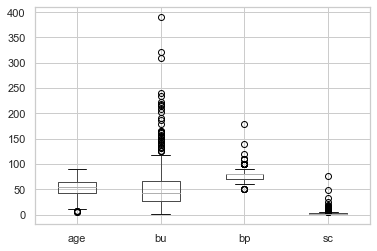

In [5]:
import matplotlib.pyplot as plt

print(df[numeric_columns].describe())

df.boxplot(column=numeric_columns)

Outlier'ların düzeltilmesi/giderilmesi. Hem Z skoruna hem de IQR skoruna göre outlier olmayan indexler elde edildi. 400 verinin içinde, 5 tane outlier bulundu ve çıkartıldı.

355


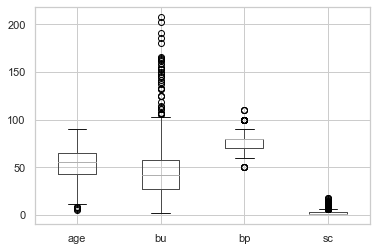

In [6]:
from scipy import stats

def removeOutliers(dataframe,col,setToMedian=True,z_threshold = 3):
  Q1 = dataframe[col].quantile(0.25)
  Q3 = dataframe[col].quantile(0.75)
  IQR = Q3 - Q1

  passedIQR =  dataframe.loc[(dataframe[col] >= (Q1 - 1.5 * IQR)) & (dataframe[col] <= (Q3 + 1.5 * IQR))].index
  safe_indexes = dataframe.iloc[np.where(np.abs(stats.zscore(dataframe[col])<z_threshold))[0]].index
  safe_indexes = set(list(passedIQR)+list(safe_indexes))
  temp = dataframe.copy()
  if (setToMedian): temp.loc[~(df.index.isin(safe_indexes)),col] = temp[col].mean()
  else: temp = temp.loc[safe_indexes]

  return temp

df_without_outliers = df.copy()
for numeric_attribute in numeric_columns:
  df_without_outliers = removeOutliers(df_without_outliers,numeric_attribute)

print(len(df_without_outliers)) #Şu andaki veri sayısı
df_without_outliers.boxplot(column=numeric_columns)
plt.show()

### Sınıfa olan korelasyonlarına göre sıralama ve görselleştirme

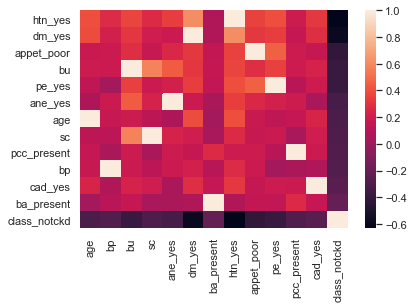

                   age        bp        bu        sc   ane_yes    dm_yes  \
htn_yes       0.400957  0.270939  0.369929  0.267400  0.344087  0.617327   
dm_yes        0.392648  0.220932  0.316228  0.198588  0.182039  1.000000   
appet_poor    0.176831  0.180088  0.284264  0.169528  0.258993  0.320166   
bu            0.187730  0.181814  1.000000  0.576702  0.446274  0.316228   
pe_yes        0.139880  0.034031  0.354520  0.180395  0.217890  0.338592   
ane_yes       0.067321  0.185627  0.446274  0.233949  1.000000  0.182039   
age           1.000000  0.168316  0.187730  0.131908  0.067321  0.392648   
sc            0.131908  0.128274  0.576702  1.000000  0.233949  0.198588   
pcc_present   0.155226  0.056270  0.187205  0.050728  0.189167  0.163298   
bp            0.168316  1.000000  0.181814  0.128274  0.185627  0.220932   
cad_yes       0.236953  0.083601  0.230801  0.198645  0.056435  0.287270   
ba_present    0.032600  0.111988  0.160745  0.051598  0.056240  0.076280   
class_notckd

In [8]:
import matplotlib.pyplot as plt
import seaborn as sn
corr = df.corr()
absolute_corr = abs(df.corr())
sn.heatmap(corr.sort_values('class_notckd', ascending=True), annot=False)
plt.show()
print(corr.sort_values('class_notckd', ascending=True))

Pearson korelasyonuna bakarsak, Böbrek yetmezliği hastalığının olup olmaması ile ilgili en yüksek negatif korelasyon yani böbrek yetmezliği hastalığının olması ile ilgili en yüksek korelasyona sahip 3 özellik sırasıyla:


1.   htn_yes(Hipertansiyonun varlığı)
2.   dm_yes(Şeker hastalığının varlığı)
3.   appet_poor(İştahın yokluğu)

özellikleridir. Buna dayanarak, hipertansiyon, iştahsızlık ve şeker hastalığının böbrek yetmezliği ile ilgisi olduğunu söyleyebiliriz.




### Korelasyon eşik değerini 0.4 kabul ederek özellikler arasında korelasyon bulunanları listelemek

<AxesSubplot:>

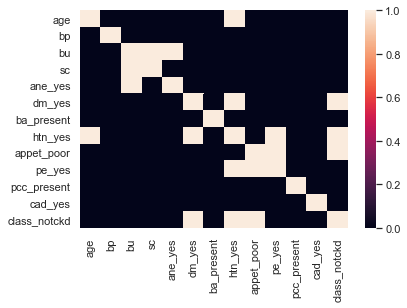

In [9]:
correlated_features = (abs(df.corr())>0.4)
sn.heatmap(correlated_features)

*   Yaş-Hipertansiyon,
*   Serum Kreatinin Değeri-Kan Üresi Değeri
*   Kan Üresi Değeri-Şeker Hastalığı
*   Kan Üresi Değeri-Pedal Ödem
*   İştahsızlık-Pedal Ödem

Özellikleri arasında korelasyon mevcut

### Nümerik özelliklerin dağılımı

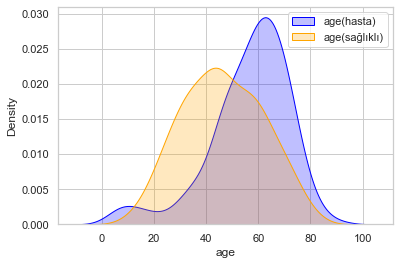

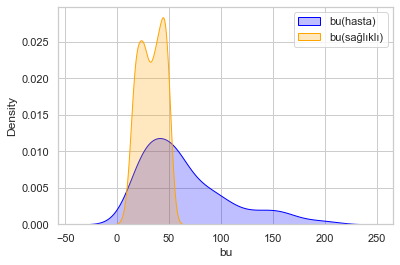

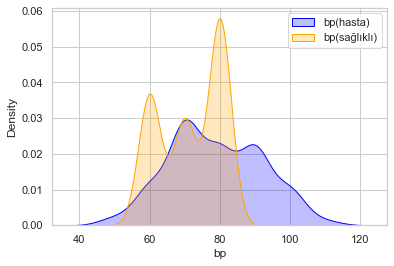

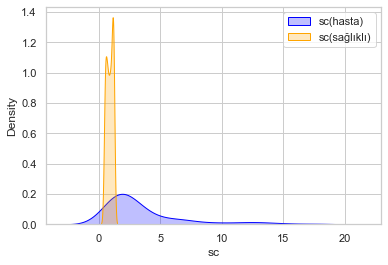

In [10]:
import seaborn as sns
samples_with_ckd = df_without_outliers.loc[df_without_outliers["class_notckd"]==0]
samples_without_ckd = df_without_outliers.loc[df_without_outliers["class_notckd"]==1]
sns.set_palette("OrRd")

for col in numeric_columns:
  sns.kdeplot(samples_with_ckd[col],shade=True, common_norm=False,color="blue")
  sns.kdeplot(samples_without_ckd[col],shade=True, common_norm=False,color="orange")
  plt.legend([col+"(hasta)",col+"(sağlıklı)"])
  plt.show()

Sağlıklı olan örneklerin nümerik özelliklerini, böbrek yetmezliğine sahip örneklerle karşılaştırdığımızda gördüğümüz üzere,

1. **sc (Serum Kreatinin Değeri):** Serum kreatin değerleri 0 ve 1 arasında olmayanlar böbrek yetmezliğine sahip fakat 0 ve 1 arasında değerlere sahip olup da böbrek yetmezliğine sahip olanlar mevcut.

2. **bu (Kan Üresi Değeri):** Kan üresi değerleri 0 ve yaklaşık 60 aralığında olmayan bireyler böbrek yetmezliğine sahip ama bu aralıktaki değerlere sahip olan hasta bireyler de mevcut.

3. **bp (Kan Basıncı Değeri):** Kan Basıncı değerleri yaklaşık 50 ve 90 arasında olmayan bireyler böbrek yetmezliğine sahip ama bu aralıkta yer alıp da hasta olanlar da çoğunlukta.

4. **age (Yaş):** Yaş, böbrek yetmezliği hastalığı için ayırt edici bir özellik değil fakat böbrek yetmezliği hastalığı olanlarda çoğunluğun 60-65 yaş arasında olduğunu söyleyebiliriz.




## Splitting Data

In [21]:
from sklearn.model_selection import train_test_split
data = df_without_outliers.copy()
x_train,x_test,y_train,y_test = train_test_split(data.loc[:,data.columns.difference(["class_notckd"])],
                                                 data.loc[:,"class_notckd"],test_size=0.25,random_state=42)
print(x_train,y_train)

#Data Leakage'ye maruz kalmamak için, eğitim verilerine id ve label bilgilerinin karışmadığından emin olalım
assert(not ("class_notckd" in x_train.columns) and not ("id" in x_train.columns))

      age  ane_yes  appet_poor  ba_present    bp          bu  cad_yes  dm_yes  \
305  41.0        0           0           0  80.0   25.000000        0       0   
66   67.0        0           0           0  70.0   55.000000        0       1   
126  70.0        0           1           0  90.0  125.000000        0       1   
287  39.0        0           0           0  70.0   22.000000        0       0   
122  34.0        1           0           0  70.0   57.887887        0       0   
..    ...      ...         ...         ...   ...         ...      ...     ...   
80   74.0        0           0           0  80.0   98.000000        0       1   
119  60.0        0           0           0  70.0   27.000000        0       0   
309  51.0        0           0           0  60.0   25.000000        0       0   
393  43.0        0           0           0  60.0   45.000000        0       0   
111  65.0        0           0           0  80.0   71.000000        1       1   

     htn_yes  pcc_present  

## Training and Testing Model

### Classification

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.97      1.00      0.99        35

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89



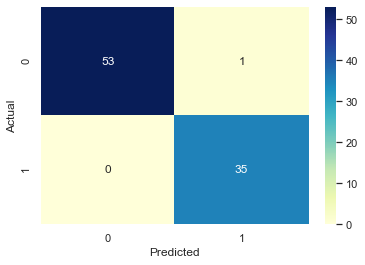

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        54
           1       0.70      0.89      0.78        35

    accuracy                           0.81        89
   macro avg       0.81      0.82      0.81        89
weighted avg       0.83      0.81      0.81        89



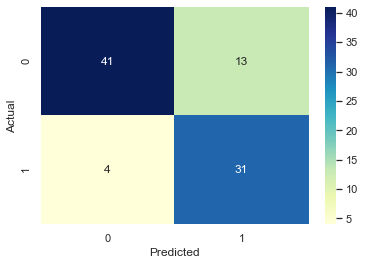

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.95      1.00      0.97        35

    accuracy                           0.98        89
   macro avg       0.97      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



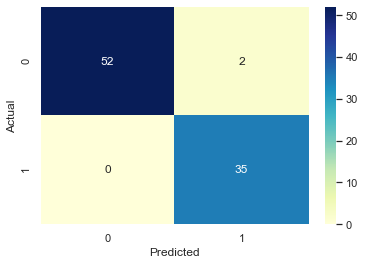

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,plot_confusion_matrix

def show_results(classifier):
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  print(classification_report(y_test,y_pred))
  confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
  sn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
  plt.show()  
models = [RandomForestClassifier(n_estimators=20,max_leaf_nodes=5),MultinomialNB(),LogisticRegression()]
for classifier in models:
  show_results(classifier)

-  Random Forest ve Lojistik Regresyon modelleri %96'nın üzerinde accuracy'e sahip iken, Multinomial Naive Bayes %76 accuracy'e sahip.

-  1, class_notckd'yi yani böbrek yetmezliğine sahip olmayanları kastederken, 0 ise bu hastalığa sahip olanları kastediyor.

-  Hastalığa sahip olmayıp, var olarak sınıflandırılanlar Random Forestve Lojistik Regresyon modellerinin sonuçlarında mevcut değil.

-  Hastalığa sahip olup, yok olarak sınıflandırılanlar ise Random Forest'da %0-%4, Multinomial Naive Bayes'de %14-%33,  Lojistik Regresyon'da ise %2-%8 arasındadır.

Bu durumda, en iyi sınıflandırmayı sağlayan model **Random Forest** olmuştur




### Clustering

KMeans(n_clusters=2)
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        54
           1       0.48      1.00      0.65        35

    accuracy                           0.57        89
   macro avg       0.74      0.65      0.55        89
weighted avg       0.80      0.57      0.53        89



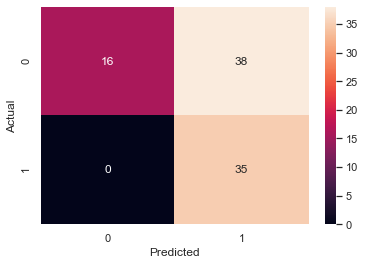

Birch(n_clusters=2, threshold=0.01)
              precision    recall  f1-score   support

           0       1.00      0.35      0.52        54
           1       0.50      1.00      0.67        35

    accuracy                           0.61        89
   macro avg       0.75      0.68      0.59        89
weighted avg       0.80      0.61      0.58        89



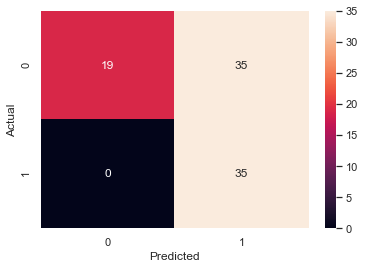

GaussianMixture(n_components=2, n_init=2)
              precision    recall  f1-score   support

           0       0.51      0.67      0.58        54
           1       0.00      0.00      0.00        35

    accuracy                           0.40        89
   macro avg       0.25      0.33      0.29        89
weighted avg       0.31      0.40      0.35        89



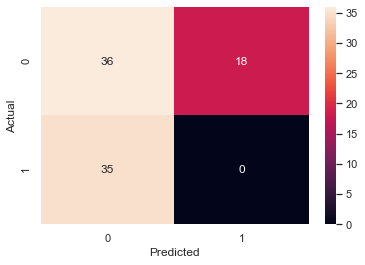

In [22]:
from sklearn.cluster import KMeans, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report

def cluster(model,x_train,x_test,y_test):
  model.fit(x_train)
  prediction = model.predict(x_test)
  print(classification_report(y_test,prediction))
  return prediction

models = [KMeans(n_clusters = 2),Birch(threshold=0.01, n_clusters=2),GaussianMixture(n_components=2,n_init=2)]
for model in models:
  print(model)
  y_pred = cluster(model,x_train,x_test,y_test)
  confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
  sn.heatmap(confusion_matrix, annot=True)
  plt.show()

Confusion matrix'den anlaşılacağı üzere, clustering yöntemlerinin başarı oranları yakın olmakla birlikte, en yüksek başarıya ulaşan kümeleme yöntemi **Birch** olmuştur.

Hiçbir clustering modeli, **böbrek yetmezliğine sahip olmayan birini**, **o hastalığa sahip** olarak sınıflandırmamıştır ancak **hasta birini**, **sağlıklı** olarak sınıflandırmada tüm cluster modelleri yaklaşık %60 ila %70 hata oranına sahiptir ki bu da, unsupervised yöntemlerin, supervised yöntemlere göre çoğunlukla daha az başarıya sahip olmalarından dolayıdır.